In [15]:
!pip install pandas matplotlib

In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#files = os.listdir("./results/sics_rgb/split_0/")
#files.sort()
#cases = files[::2]
#files

['case_112',
 'case_112.npy',
 'case_115',
 'case_115.npy',
 'case_117',
 'case_117.npy',
 'case_129',
 'case_129.npy',
 'case_130',
 'case_130.npy',
 'case_131',
 'case_131.npy',
 'case_144',
 'case_144.npy',
 'case_149',
 'case_149.npy',
 'case_156',
 'case_156.npy',
 'case_157',
 'case_157.npy',
 'case_160',
 'case_160.npy',
 'case_161',
 'case_161.npy',
 'case_162',
 'case_162.npy',
 'case_166',
 'case_166.npy']

In [29]:
def get_labels_start_end_time(frame_wise_labels, bg_class=[""]):
    labels = []
    starts = []
    ends = []
    last_label = frame_wise_labels[0]
    if frame_wise_labels[0] not in bg_class:
        labels.append(frame_wise_labels[0])
        starts.append(0)
    for i in range(len(frame_wise_labels)):
        if frame_wise_labels[i] != last_label:
            if frame_wise_labels[i] not in bg_class:
                labels.append(frame_wise_labels[i])
                starts.append(i)
            if last_label not in bg_class:
                ends.append(i)
            last_label = frame_wise_labels[i]
    if last_label not in bg_class:
        ends.append(i)
    return labels, starts, ends

def read_file(path): 
    with open(path, 'r') as f: 
        content = f.read()
    return content

def survey(results, category_names, colors, ax, fig_size=(25, 3)):
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data))
    
    for i, (colname, color) in enumerate(zip(category_names, colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh([""], widths, left=starts, height=0.75, label=colname, color=color)

        r, g, b = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, labels=[colname], label_type='center', color=text_color, rotation=90 if fig_size[1] >=3 else 0 )
    return ax


Drawing results for: case_271


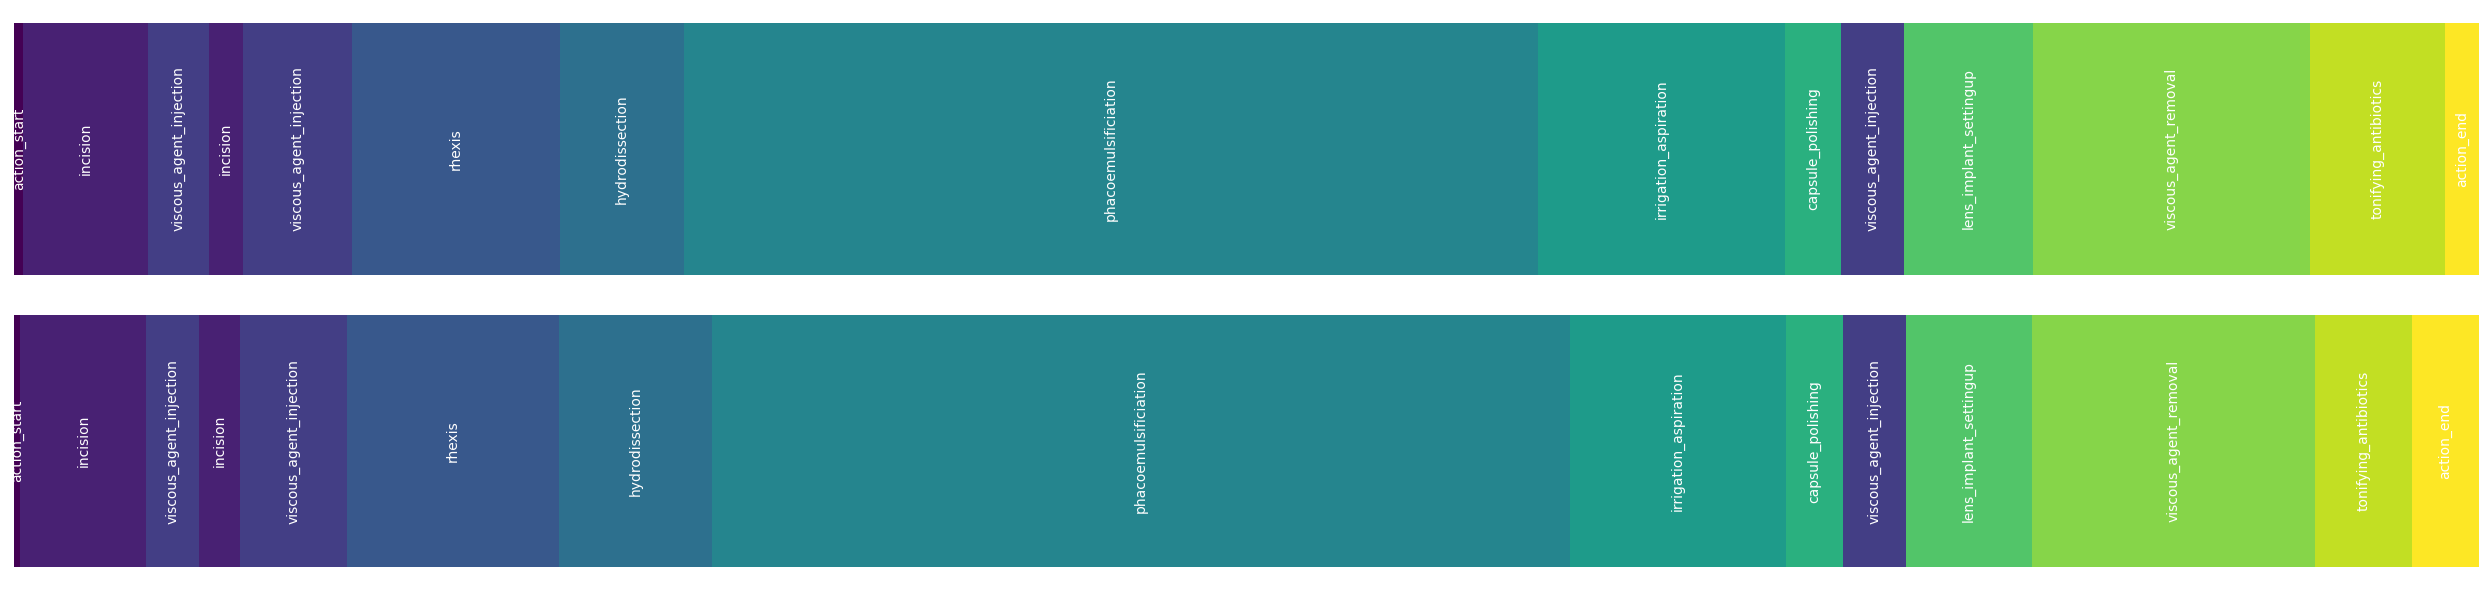

Drawing results for: case_279


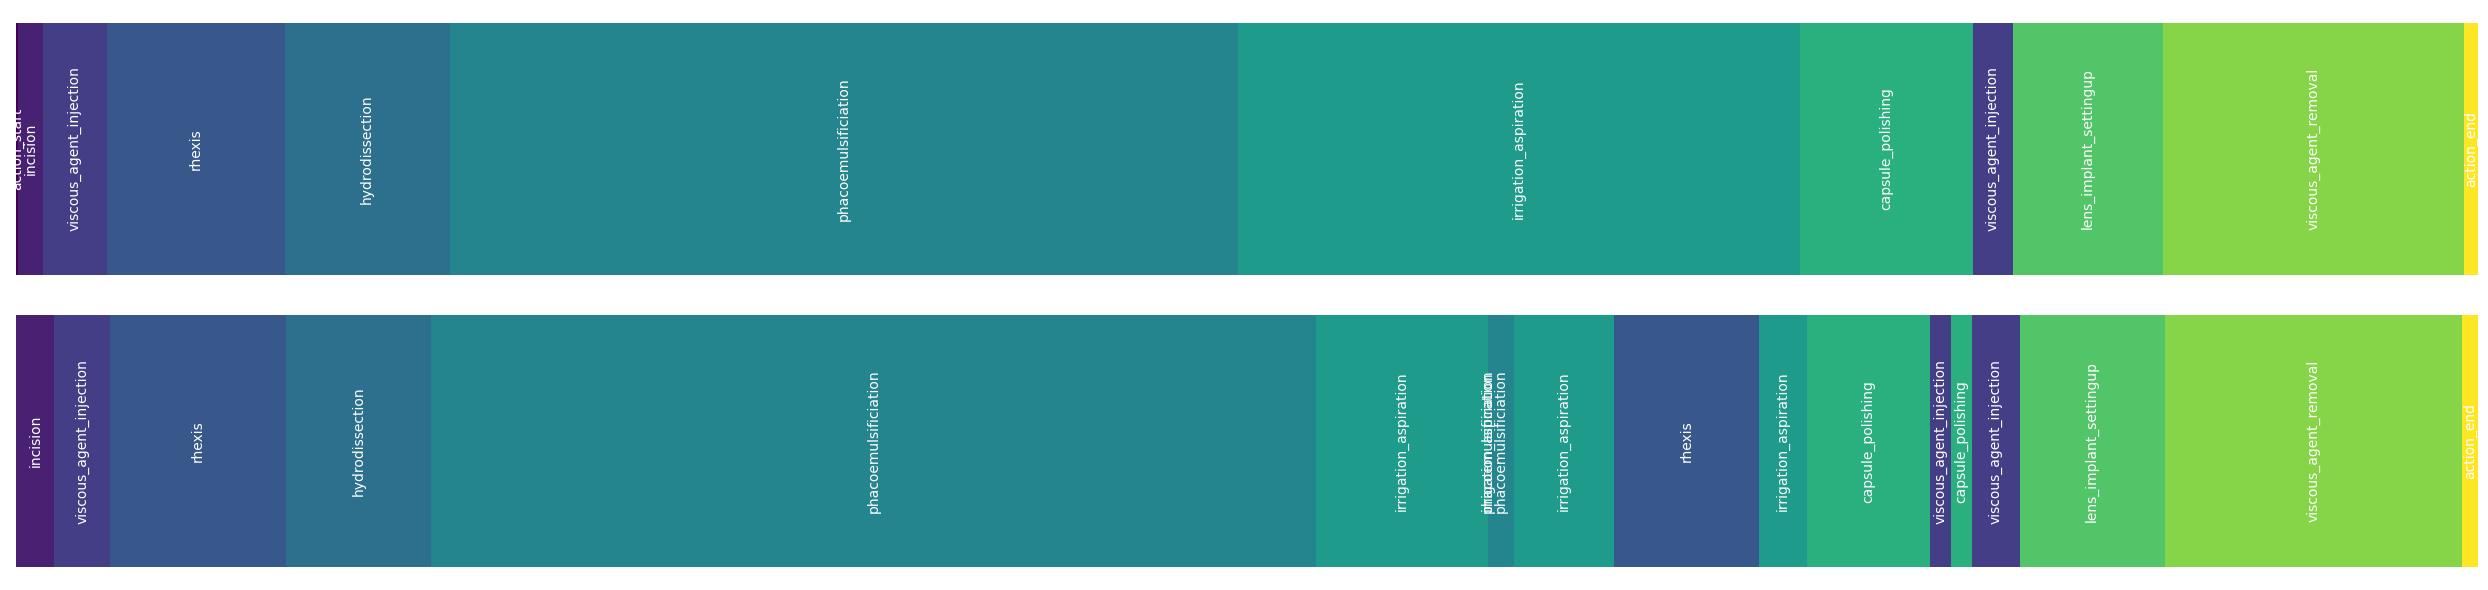

Drawing results for: case_294


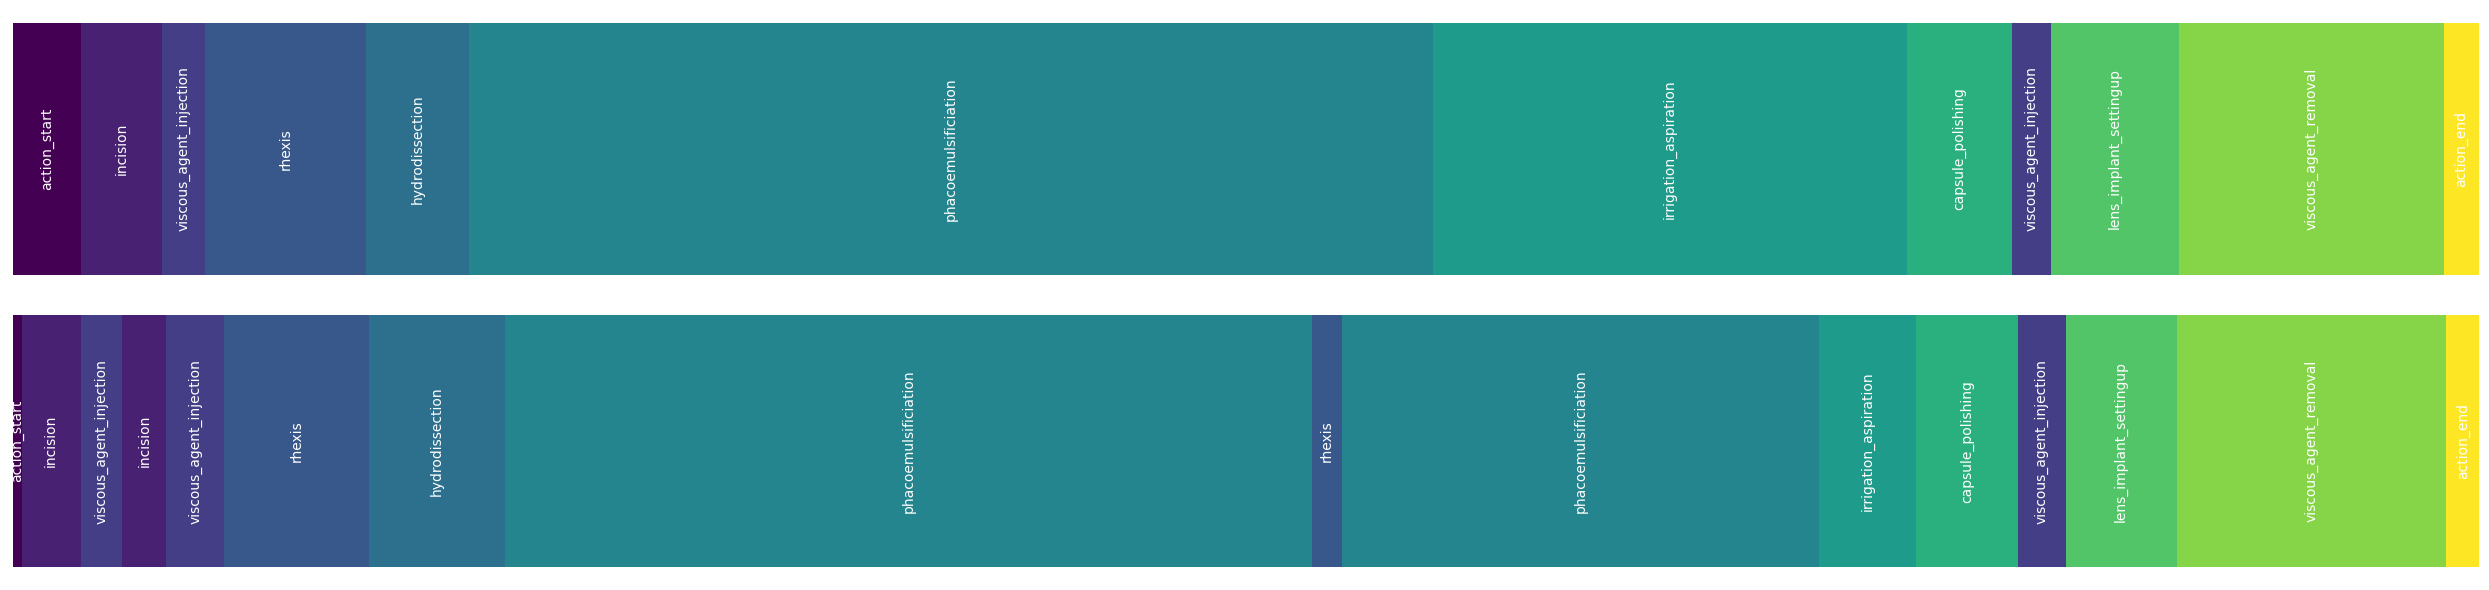

Drawing results for: case_739


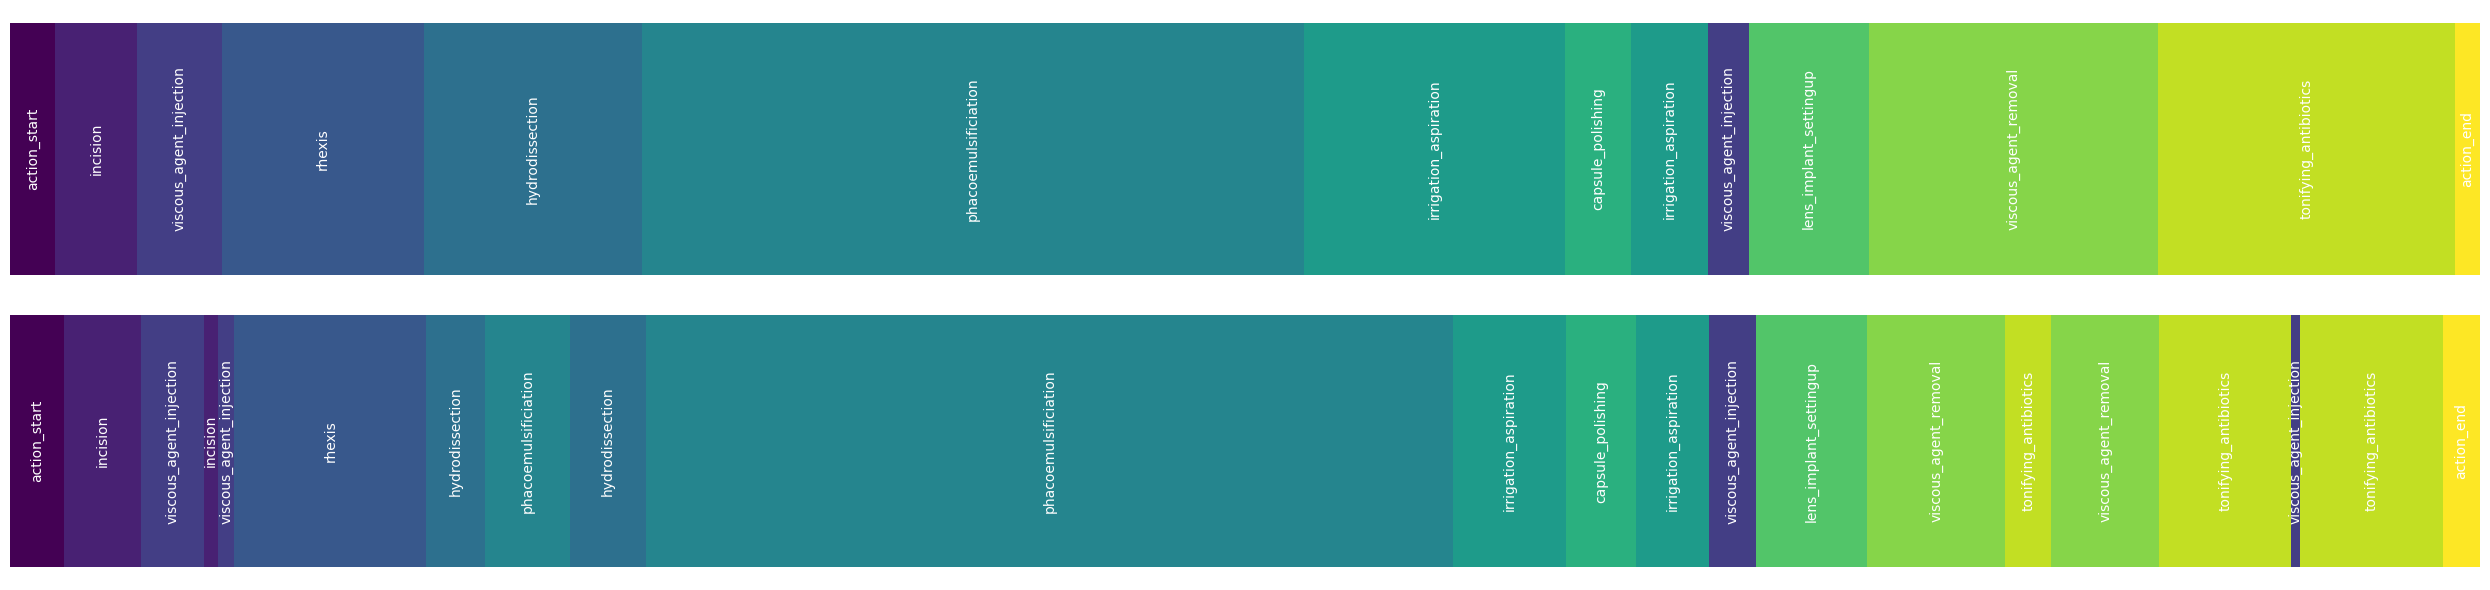

Drawing results for: case_768


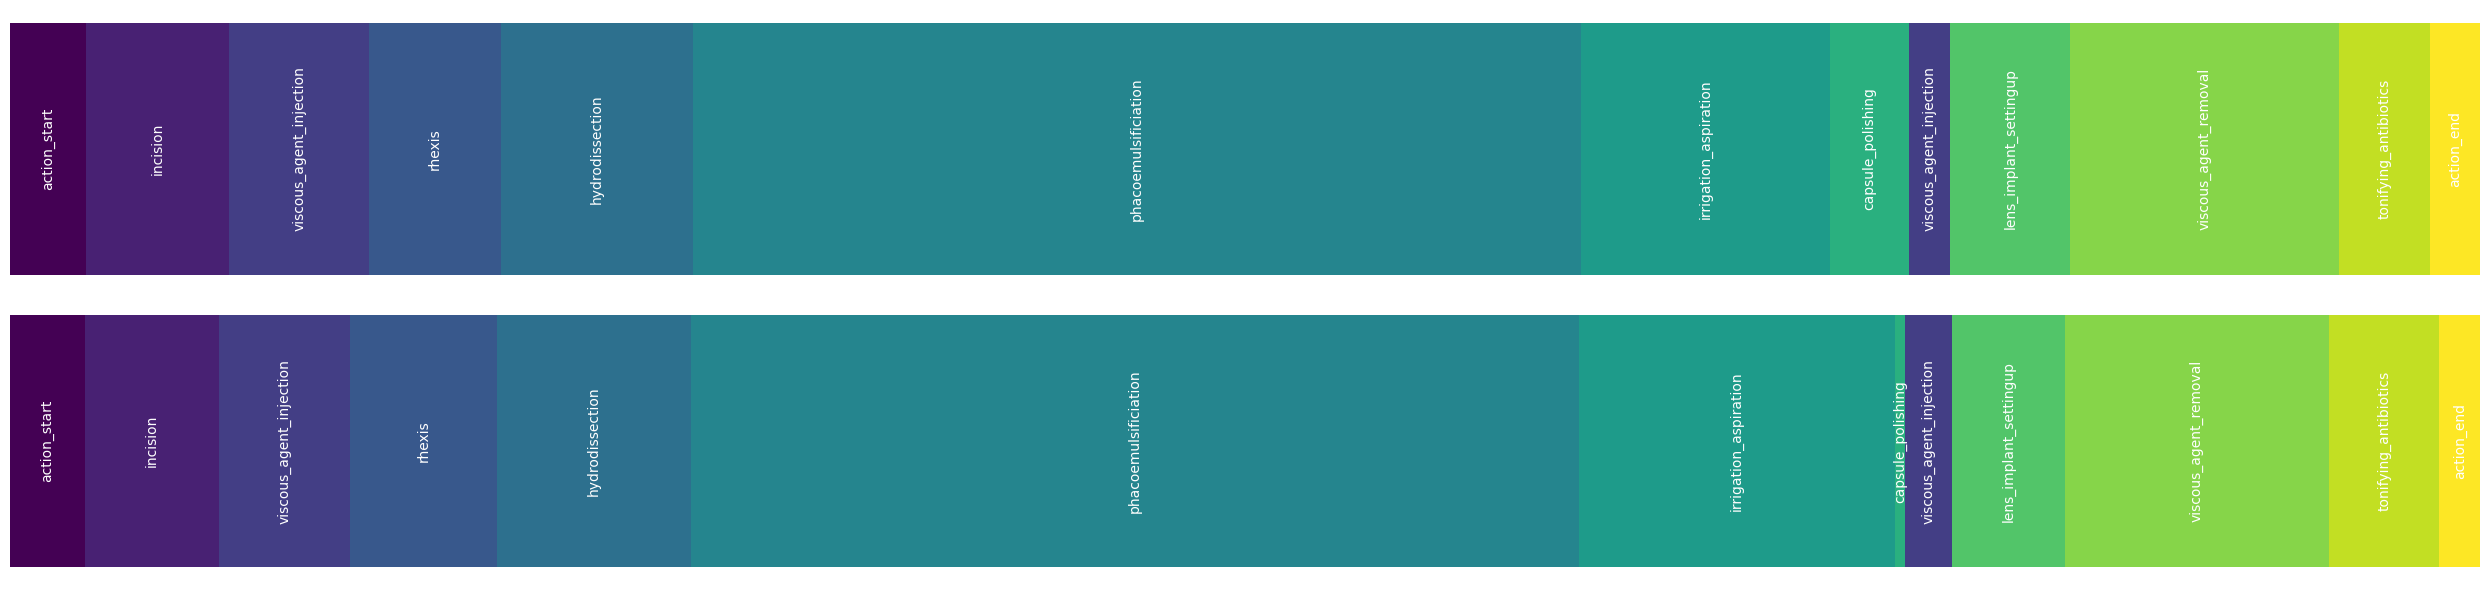

Drawing results for: case_778


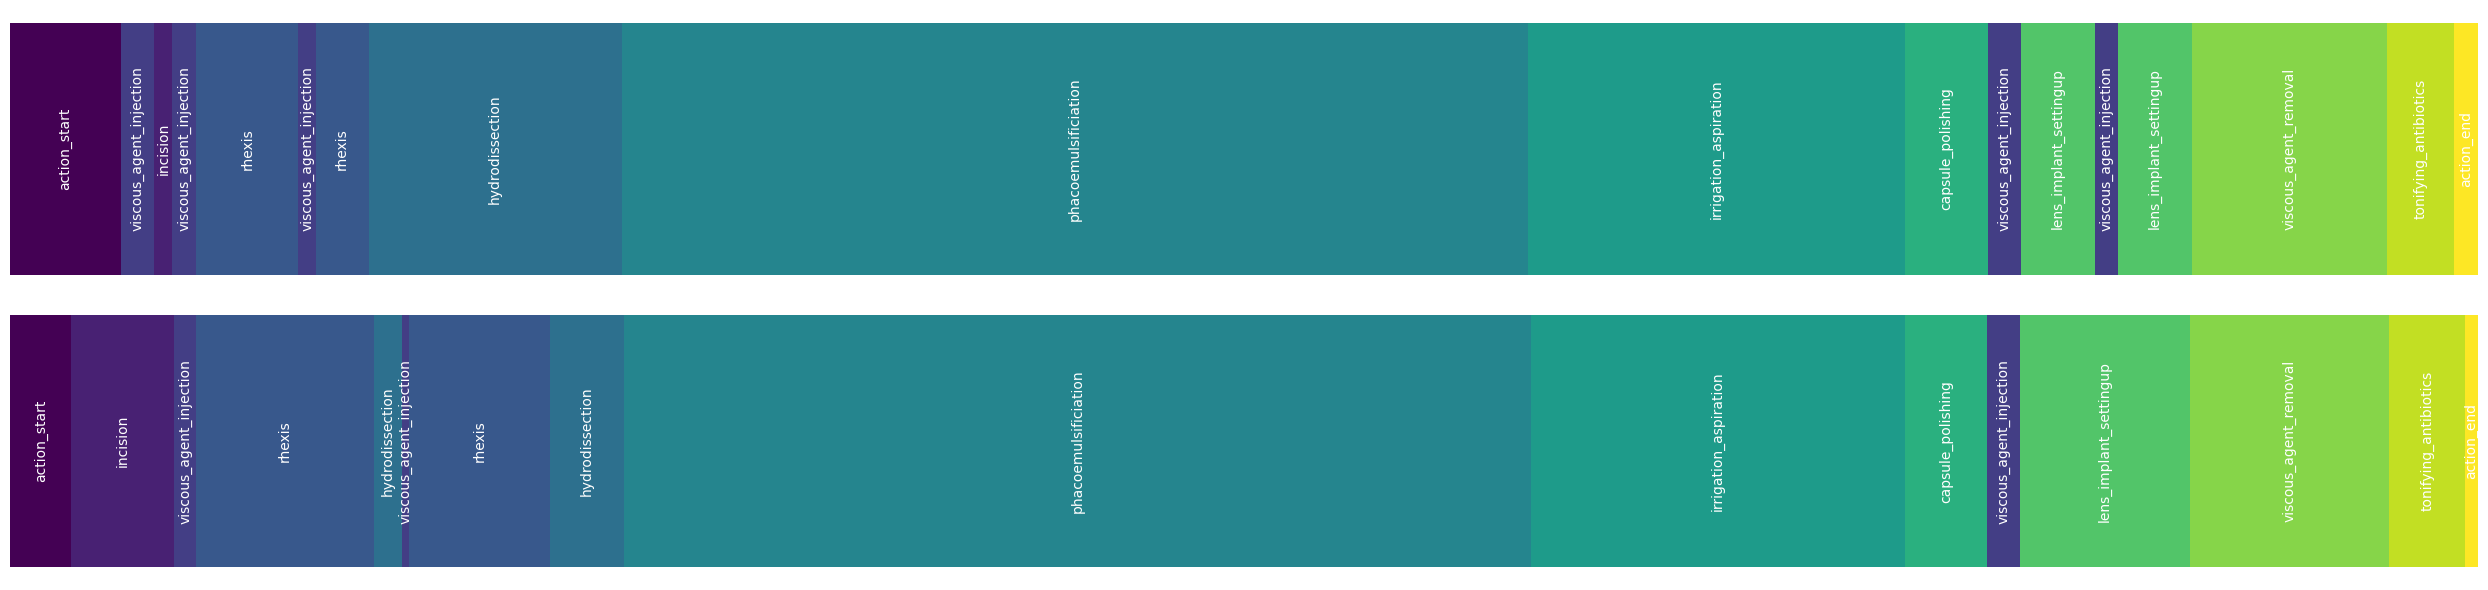

Drawing results for: case_801


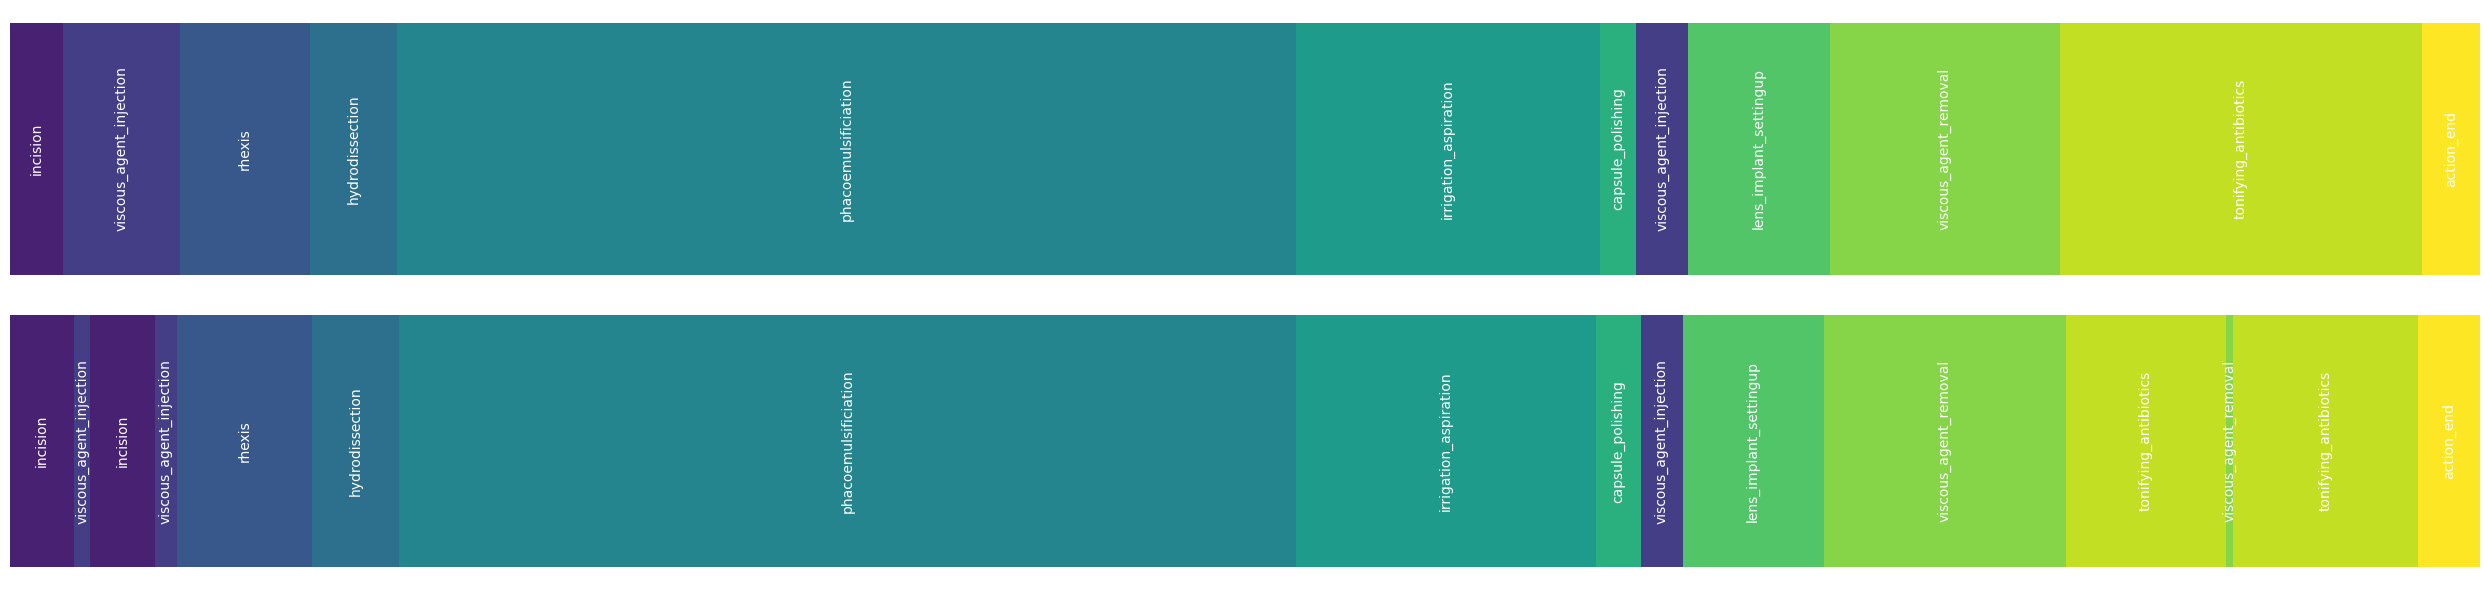

Drawing results for: case_835


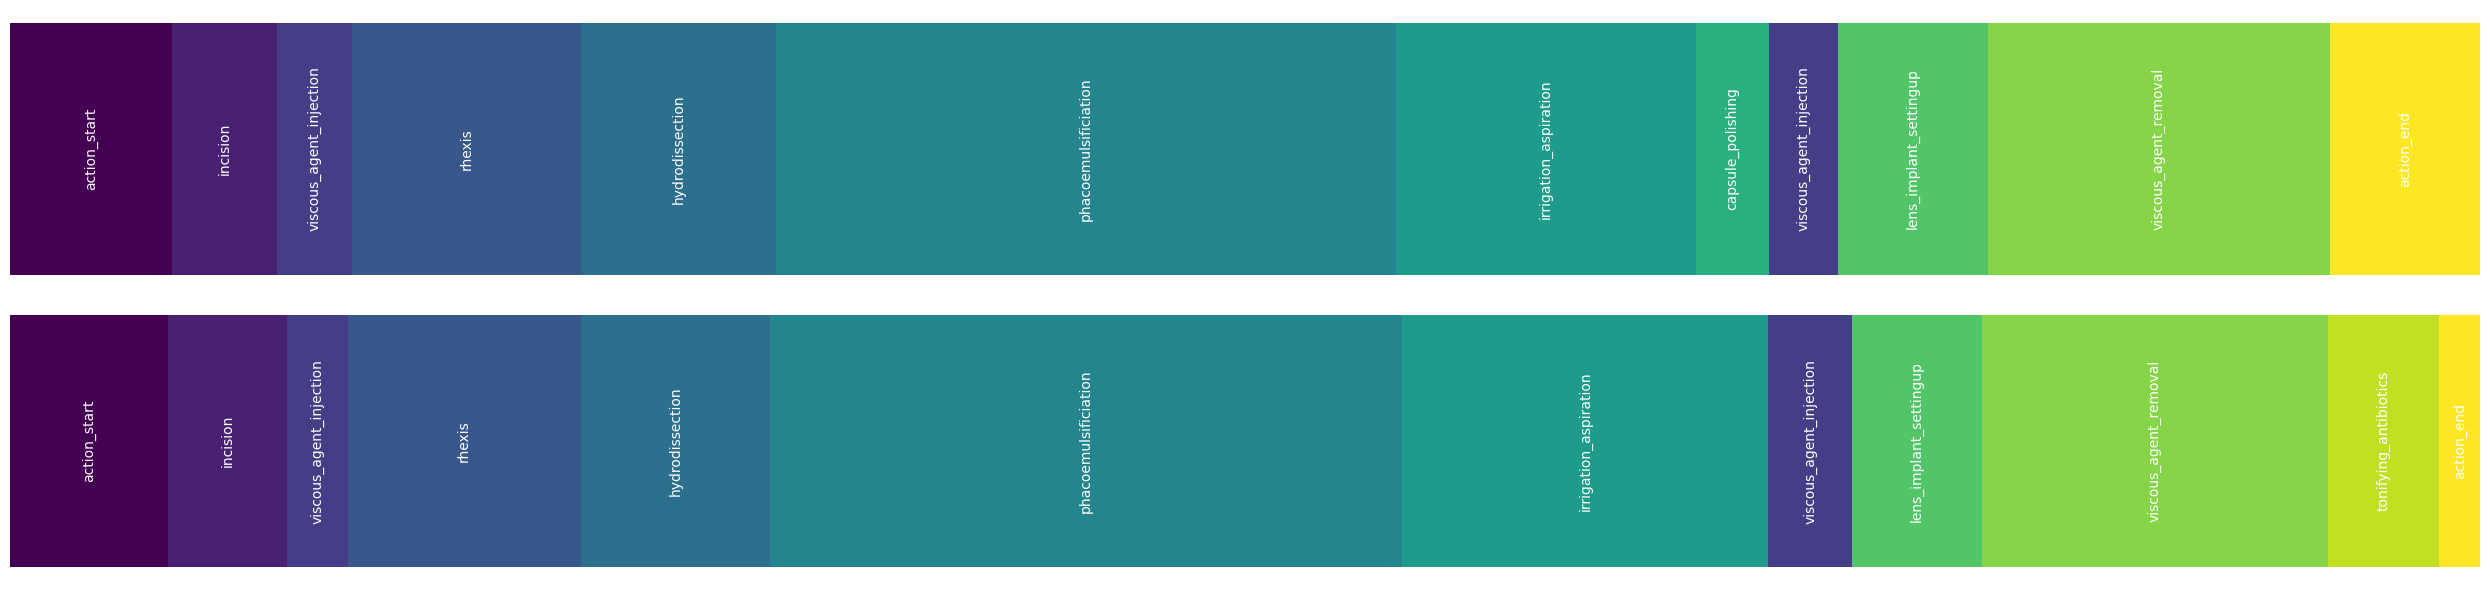

Drawing results for: case_849


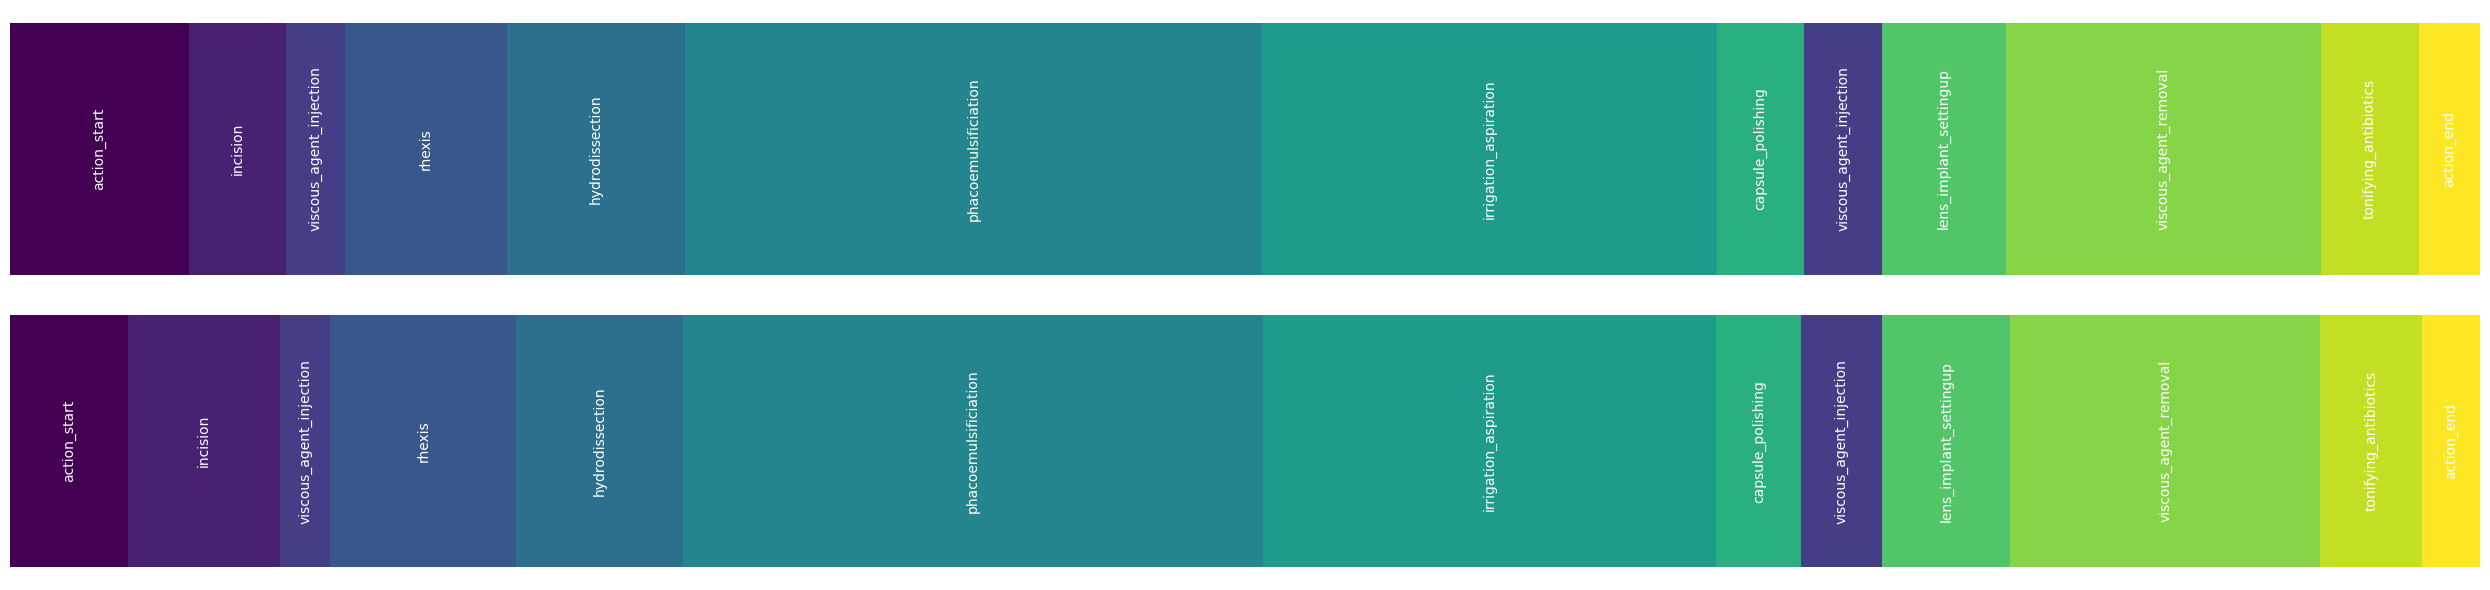

Drawing results for: case_850


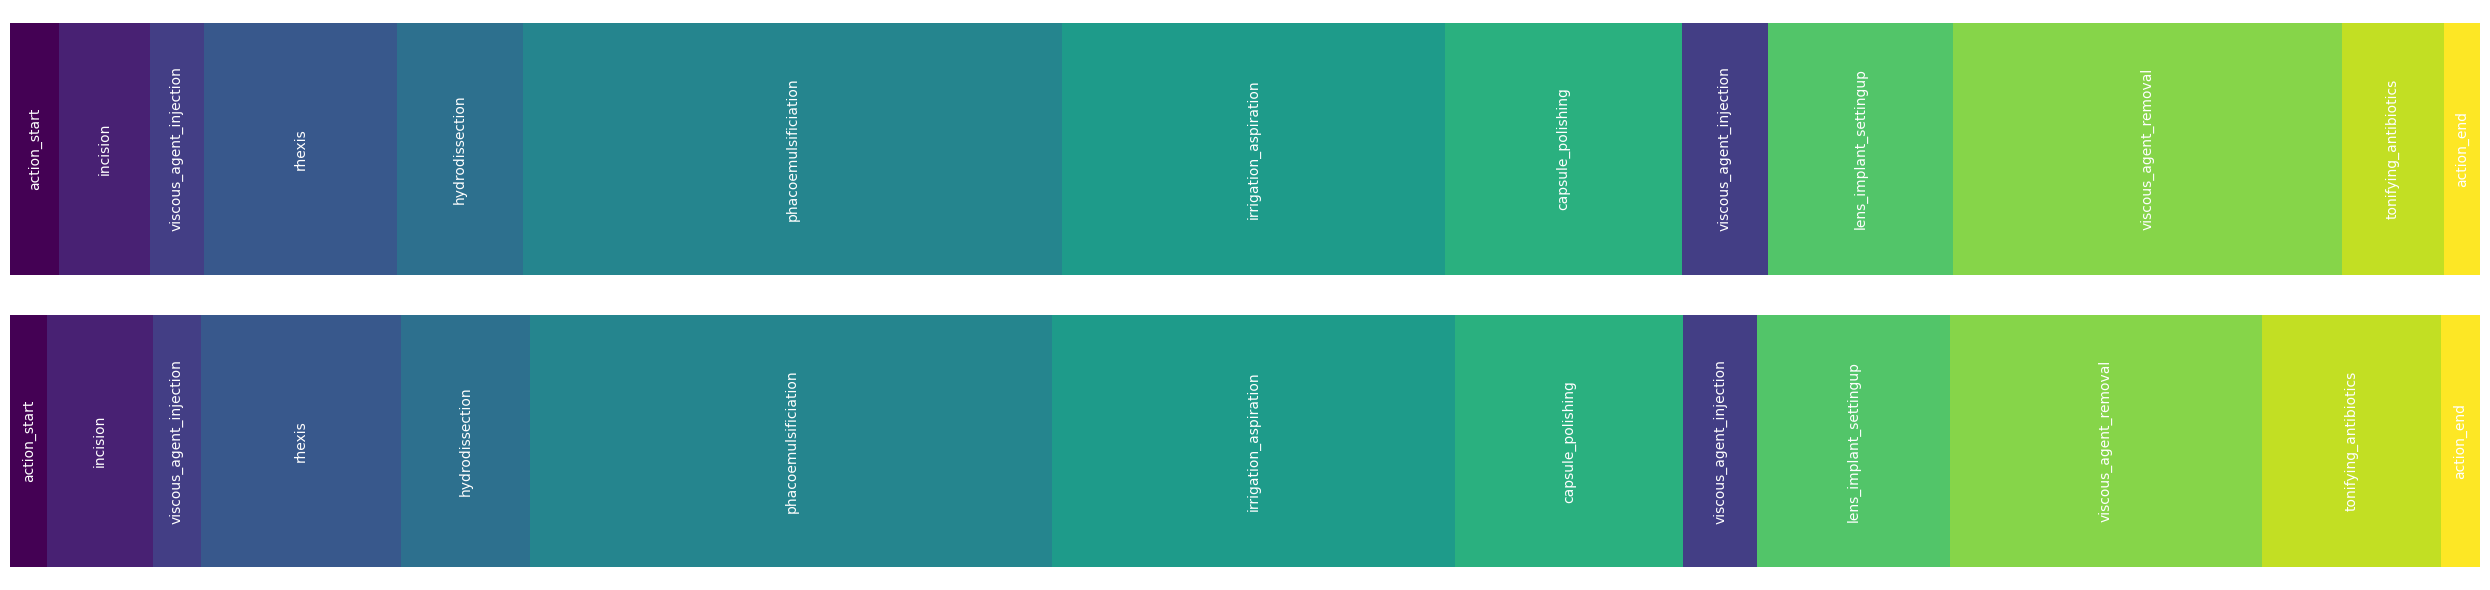

Drawing results for: case_861


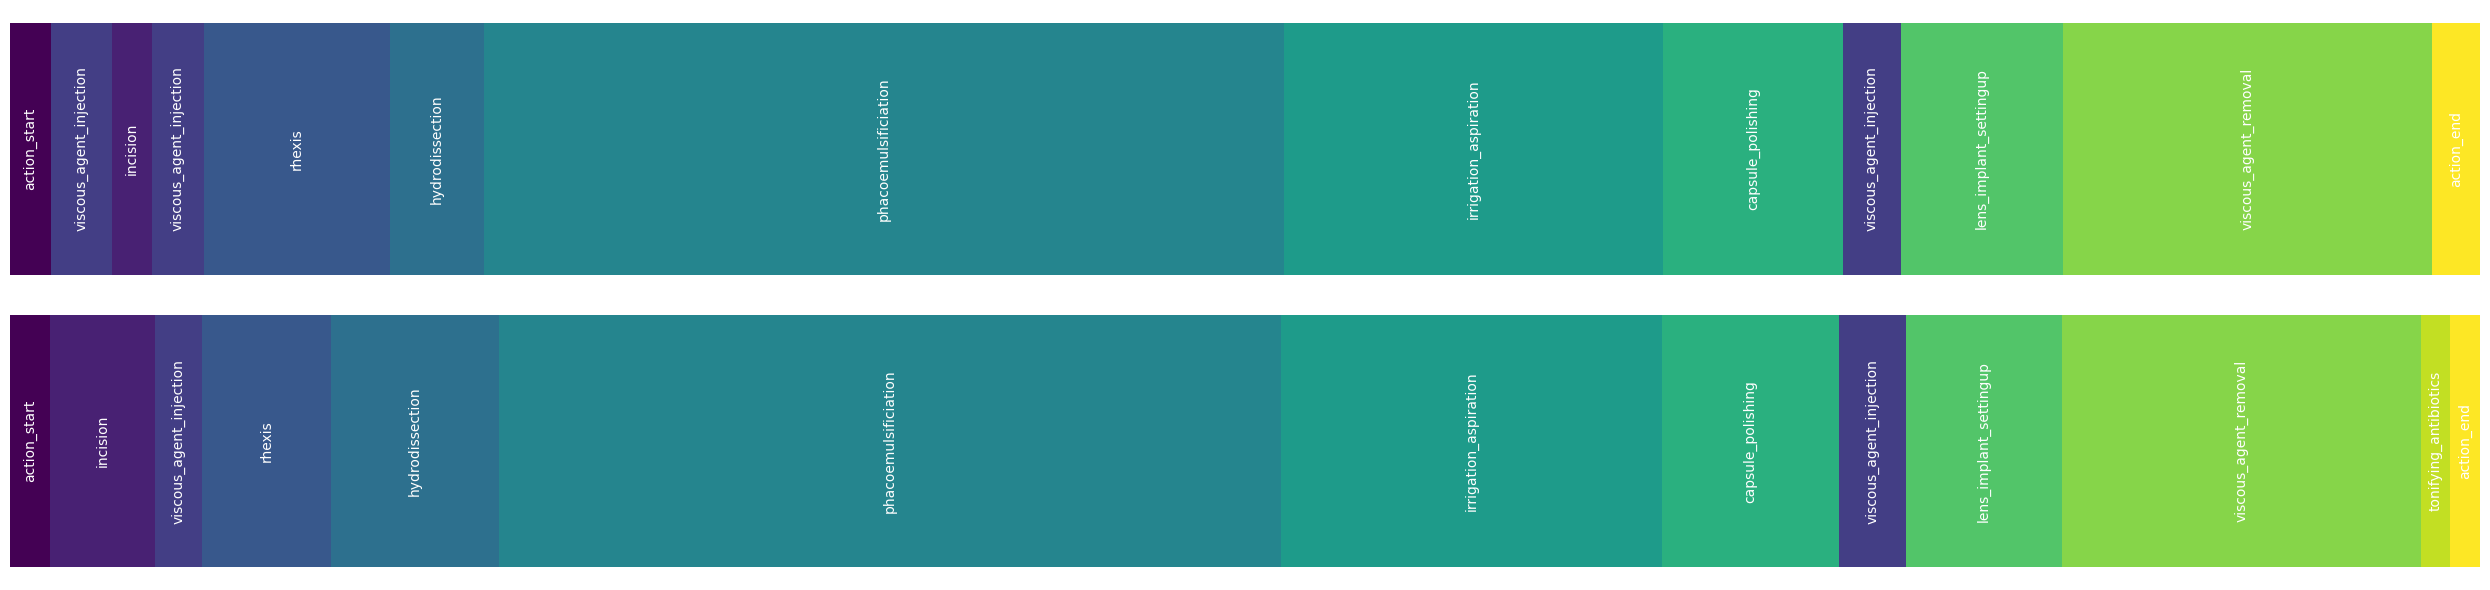

Drawing results for: case_863


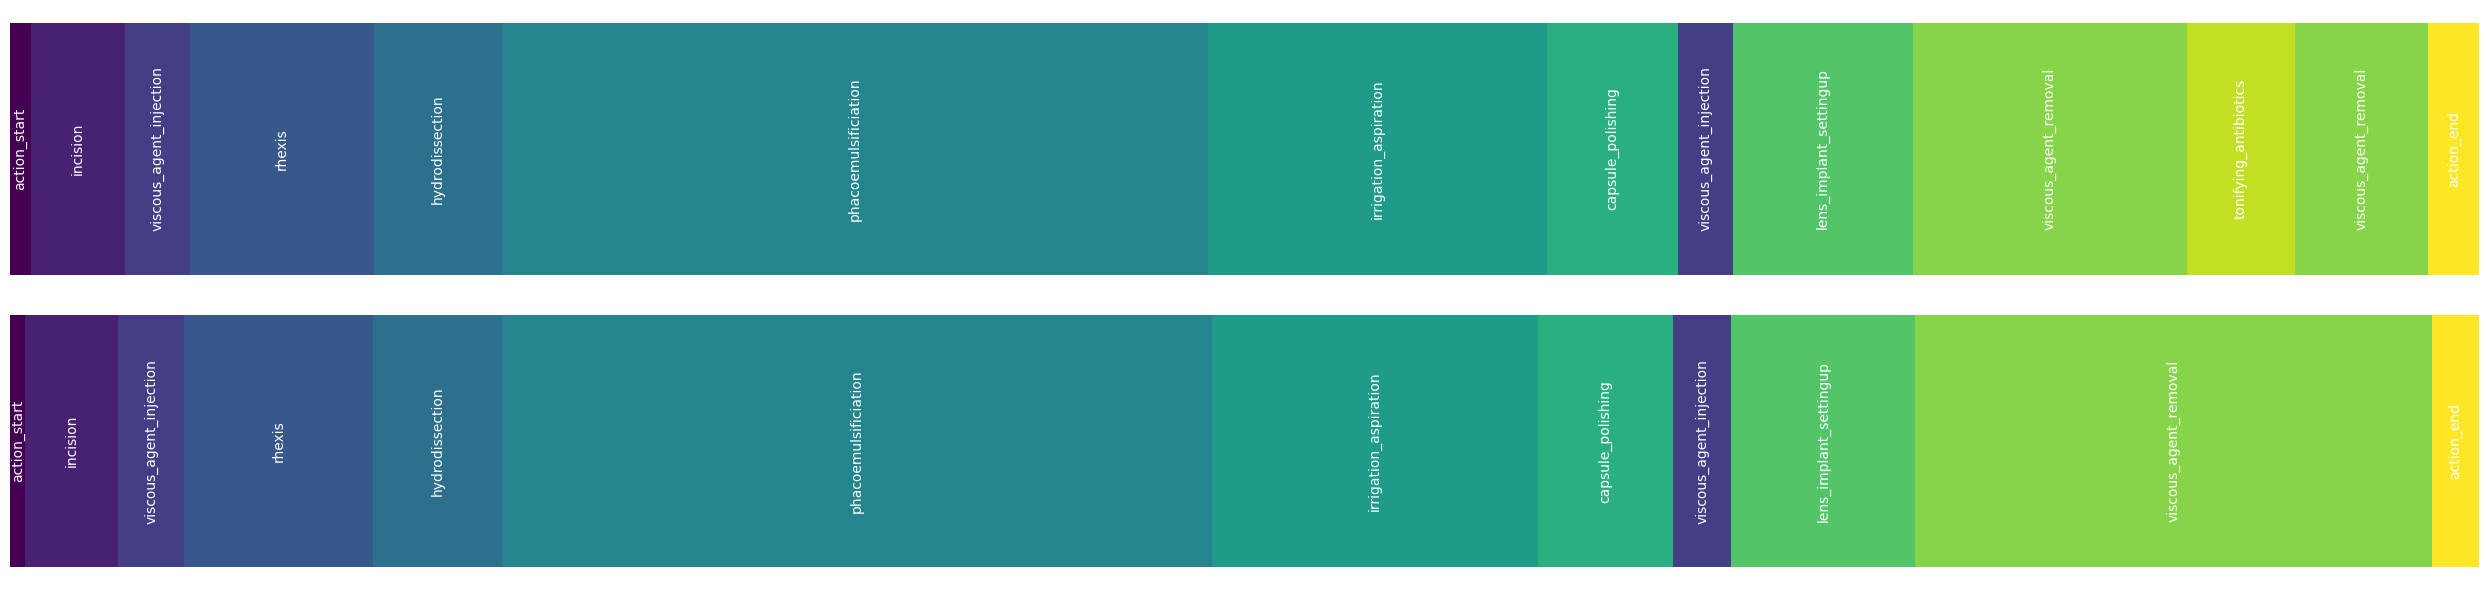

Drawing results for: case_867


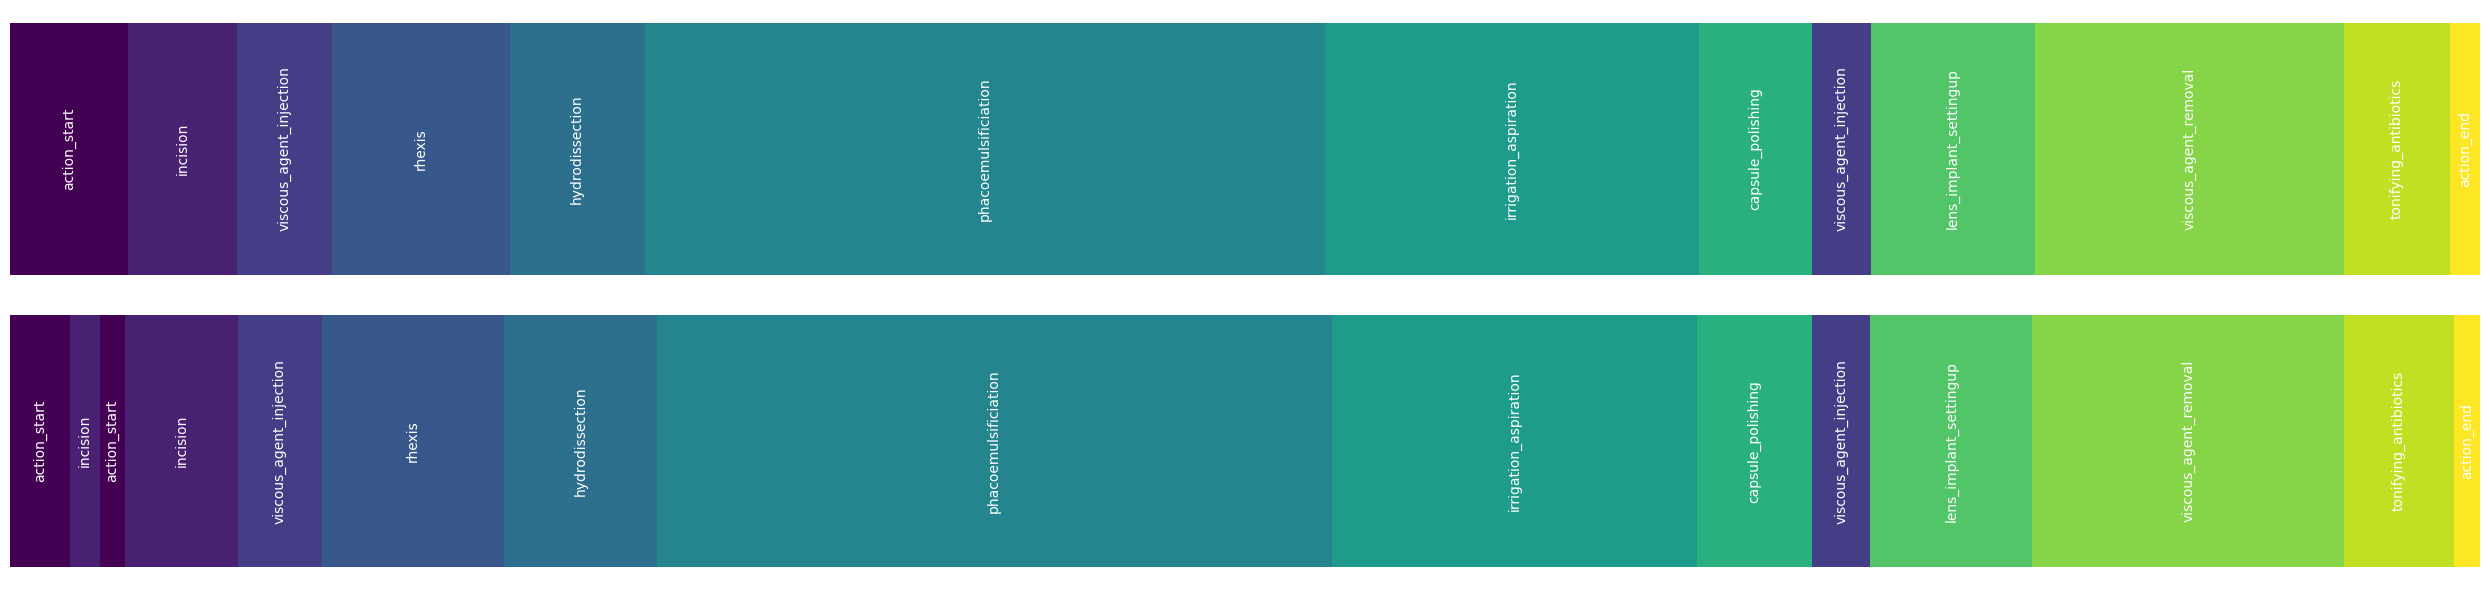

Drawing results for: case_868


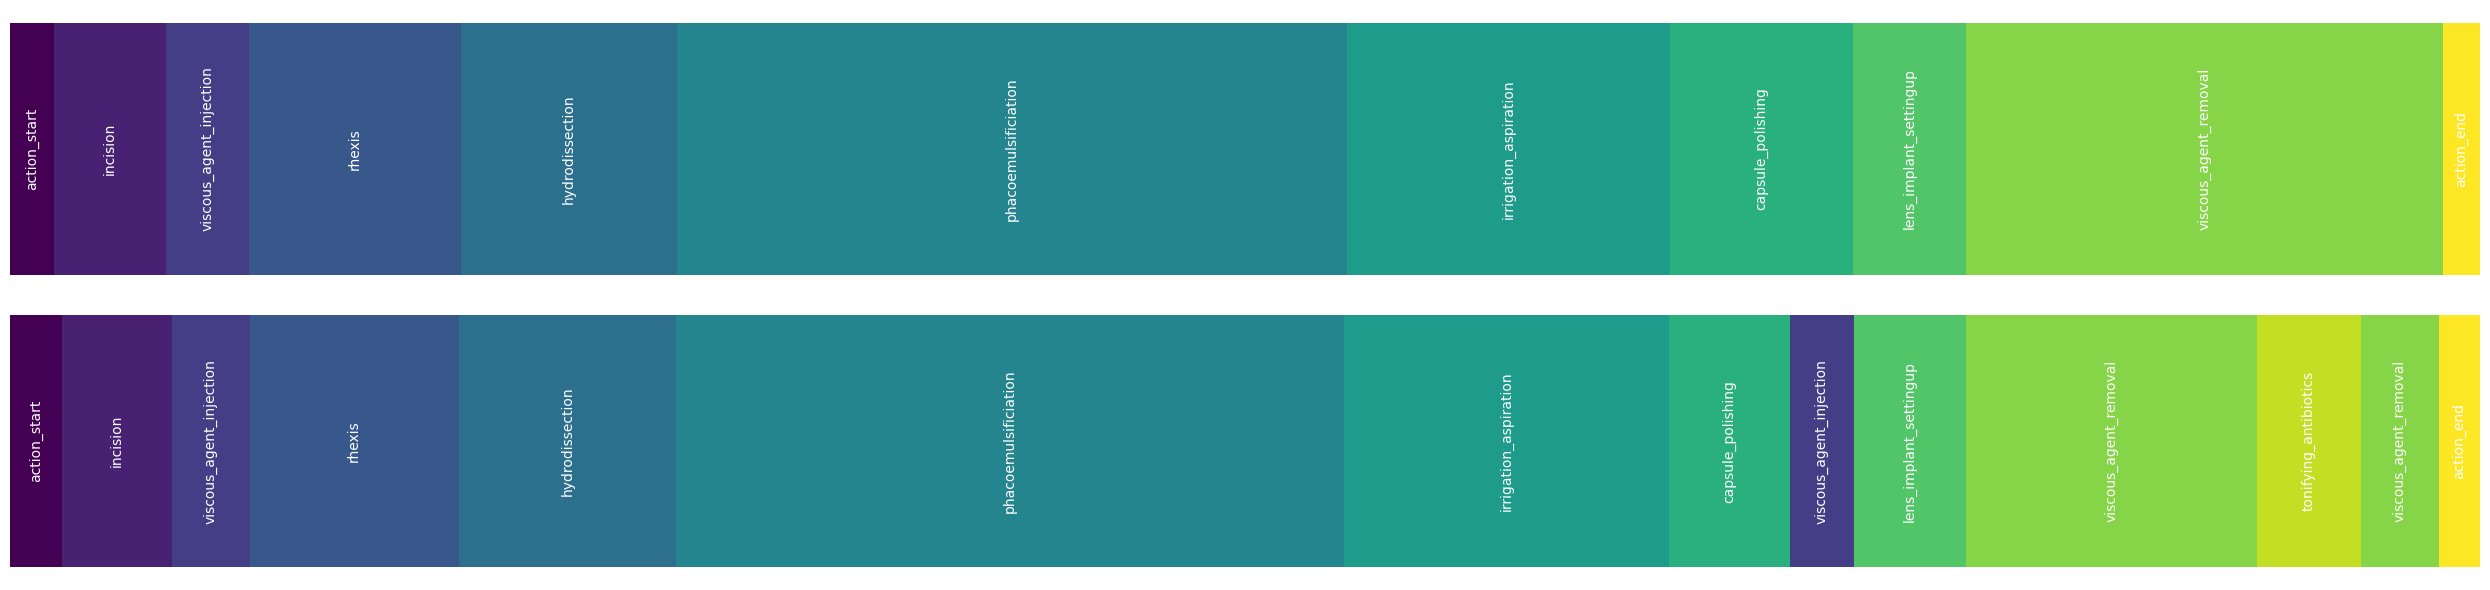

Drawing results for: case_880


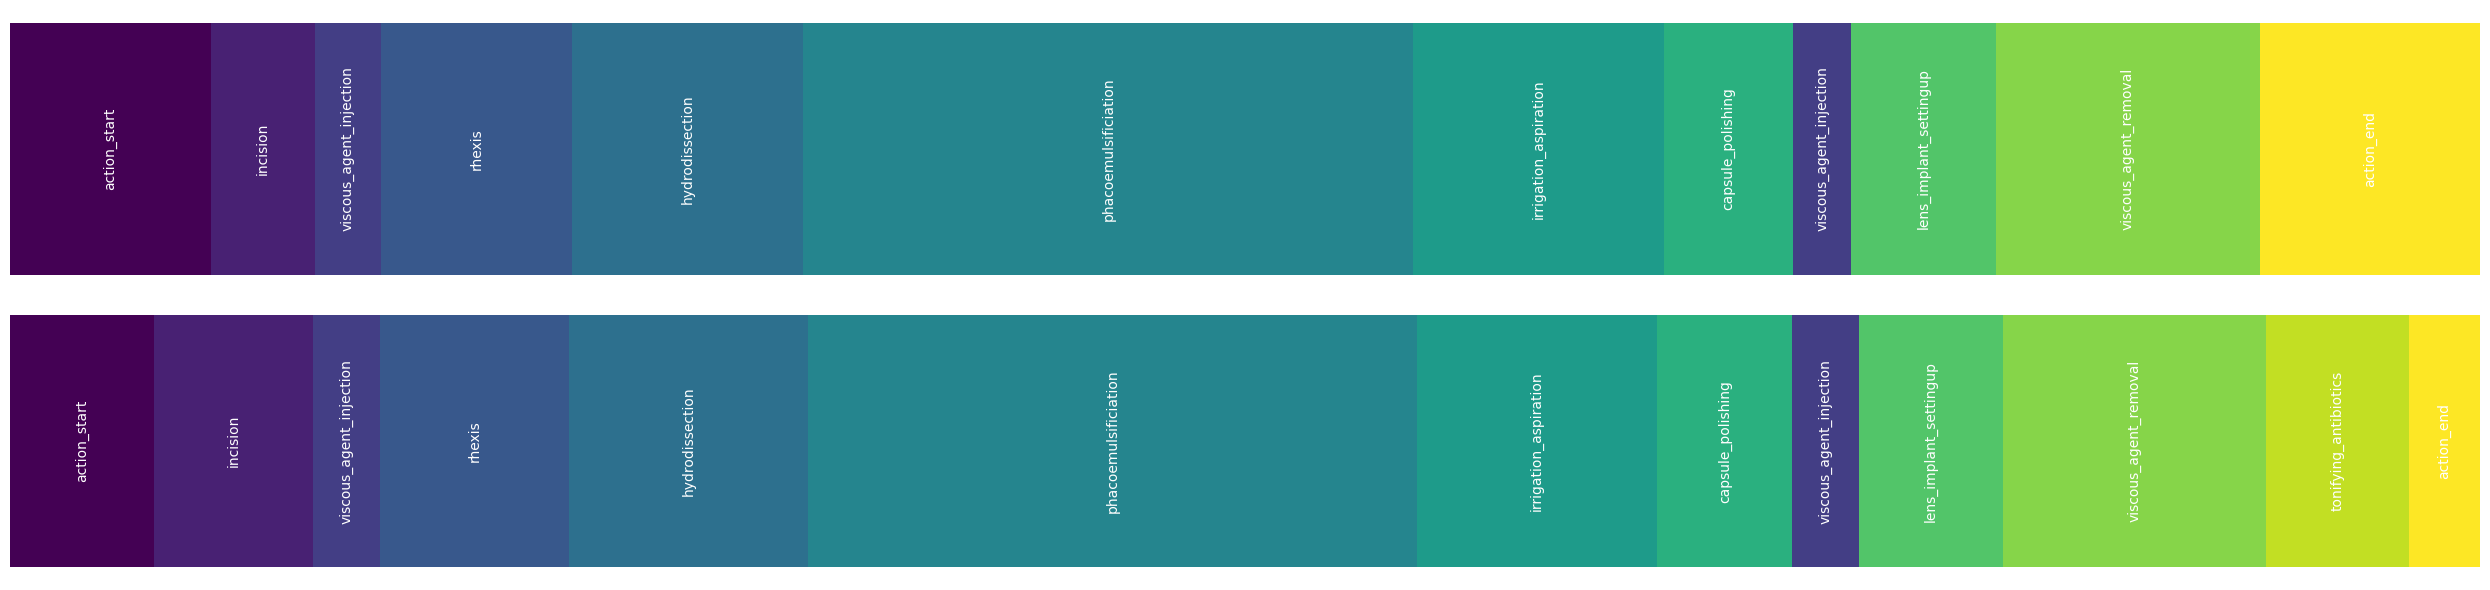

Drawing results for: case_887


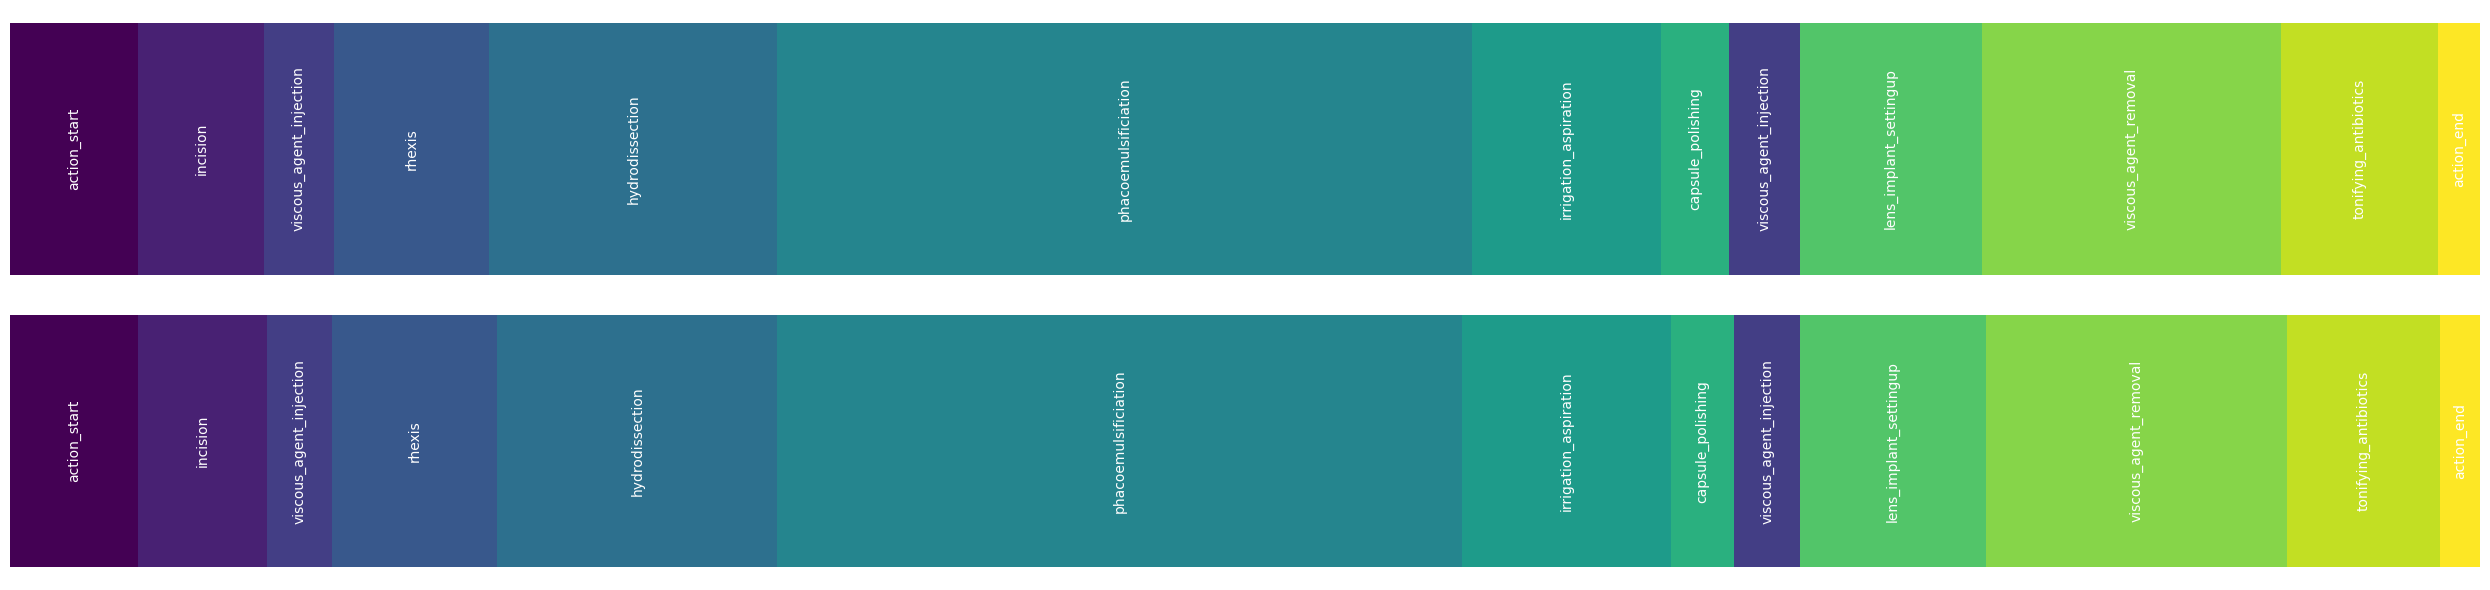

Drawing results for: case_891


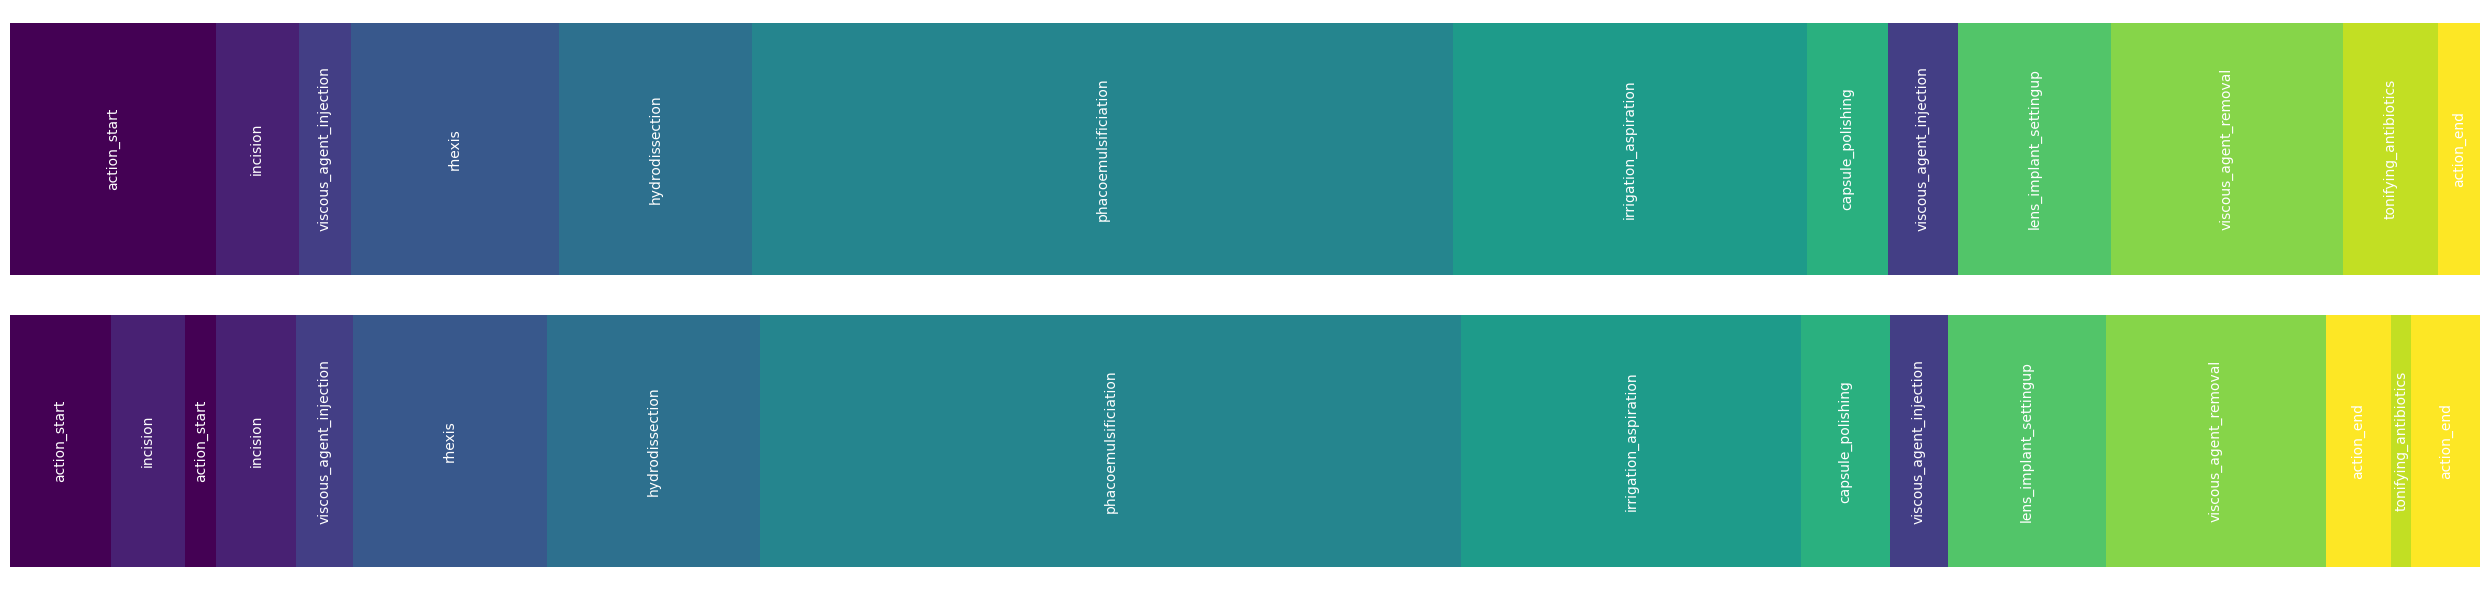

Drawing results for: case_895


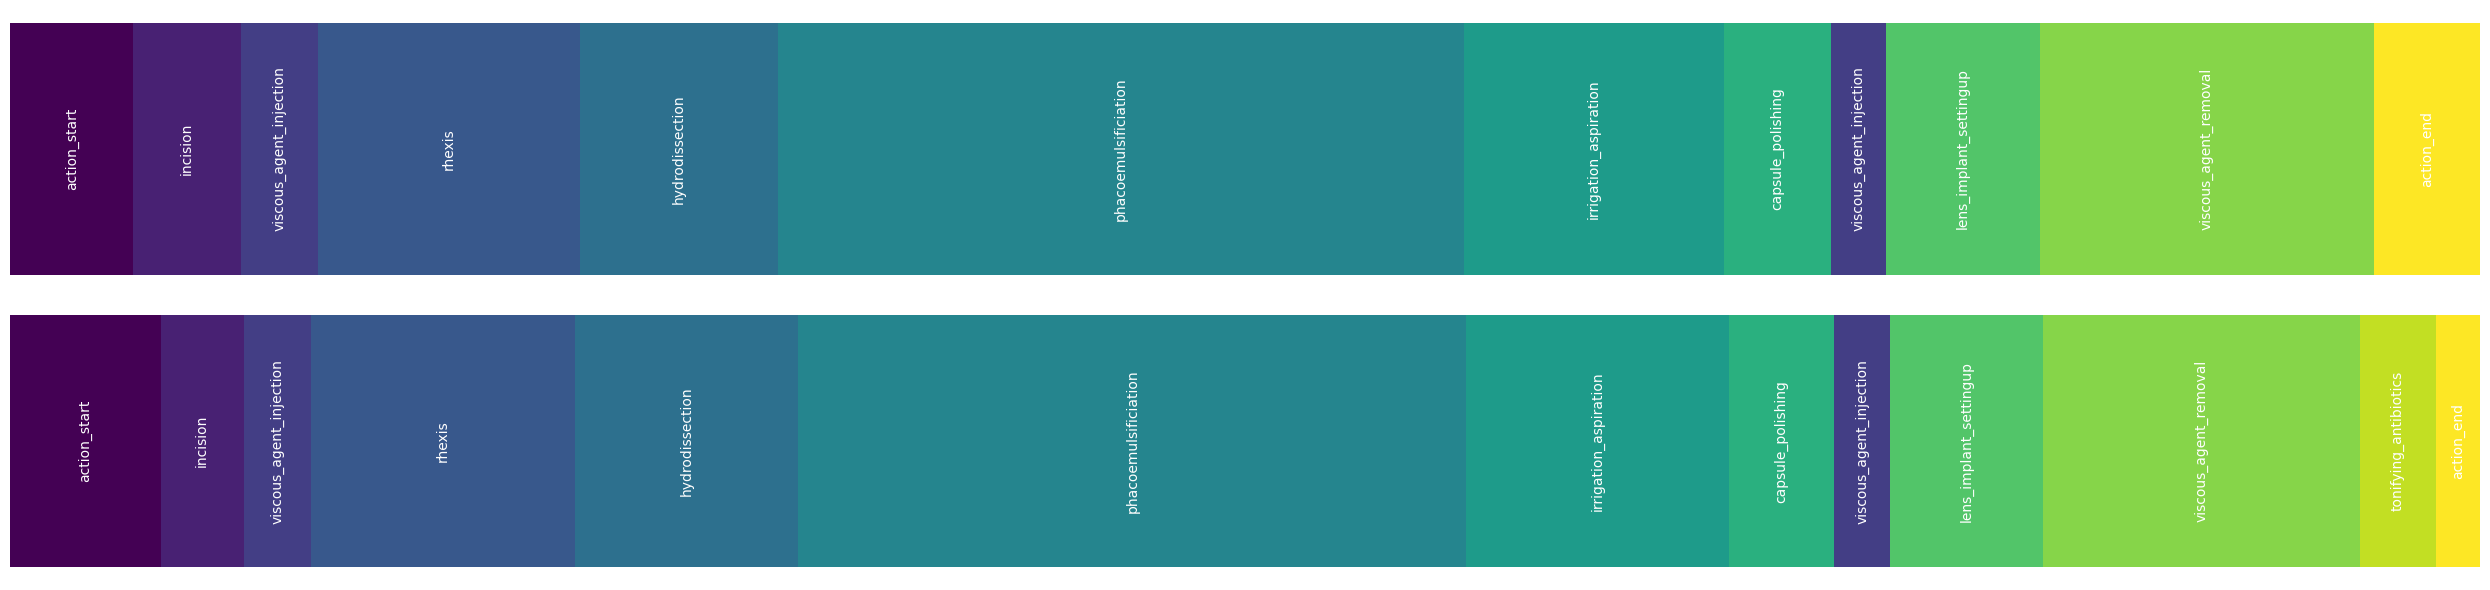

Drawing results for: case_909


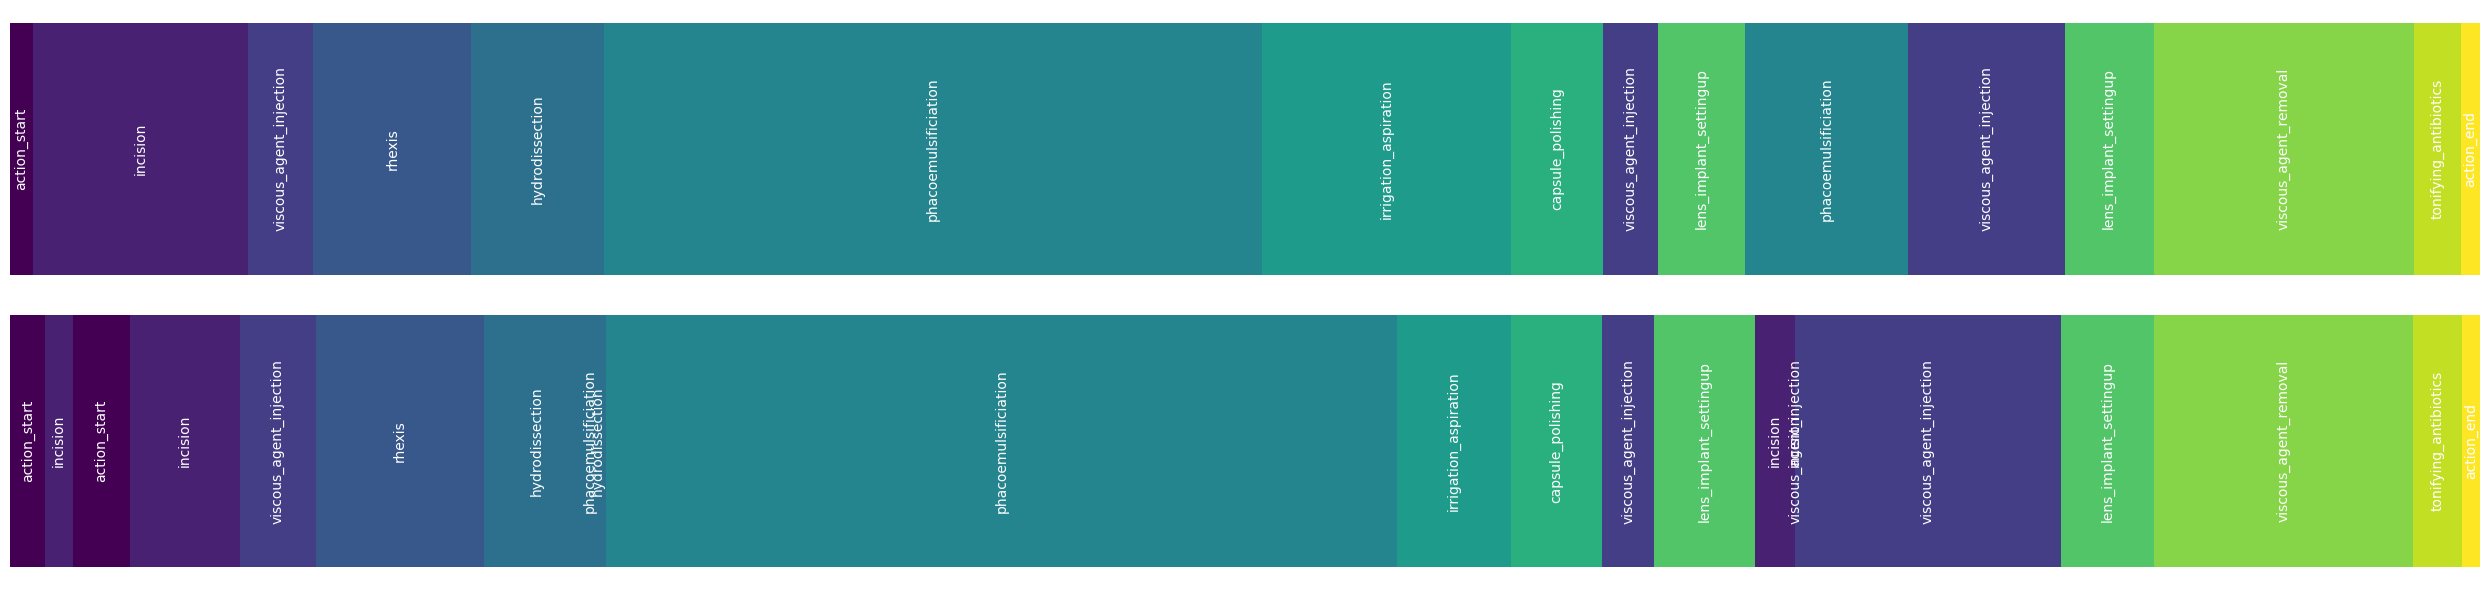

Drawing results for: case_926


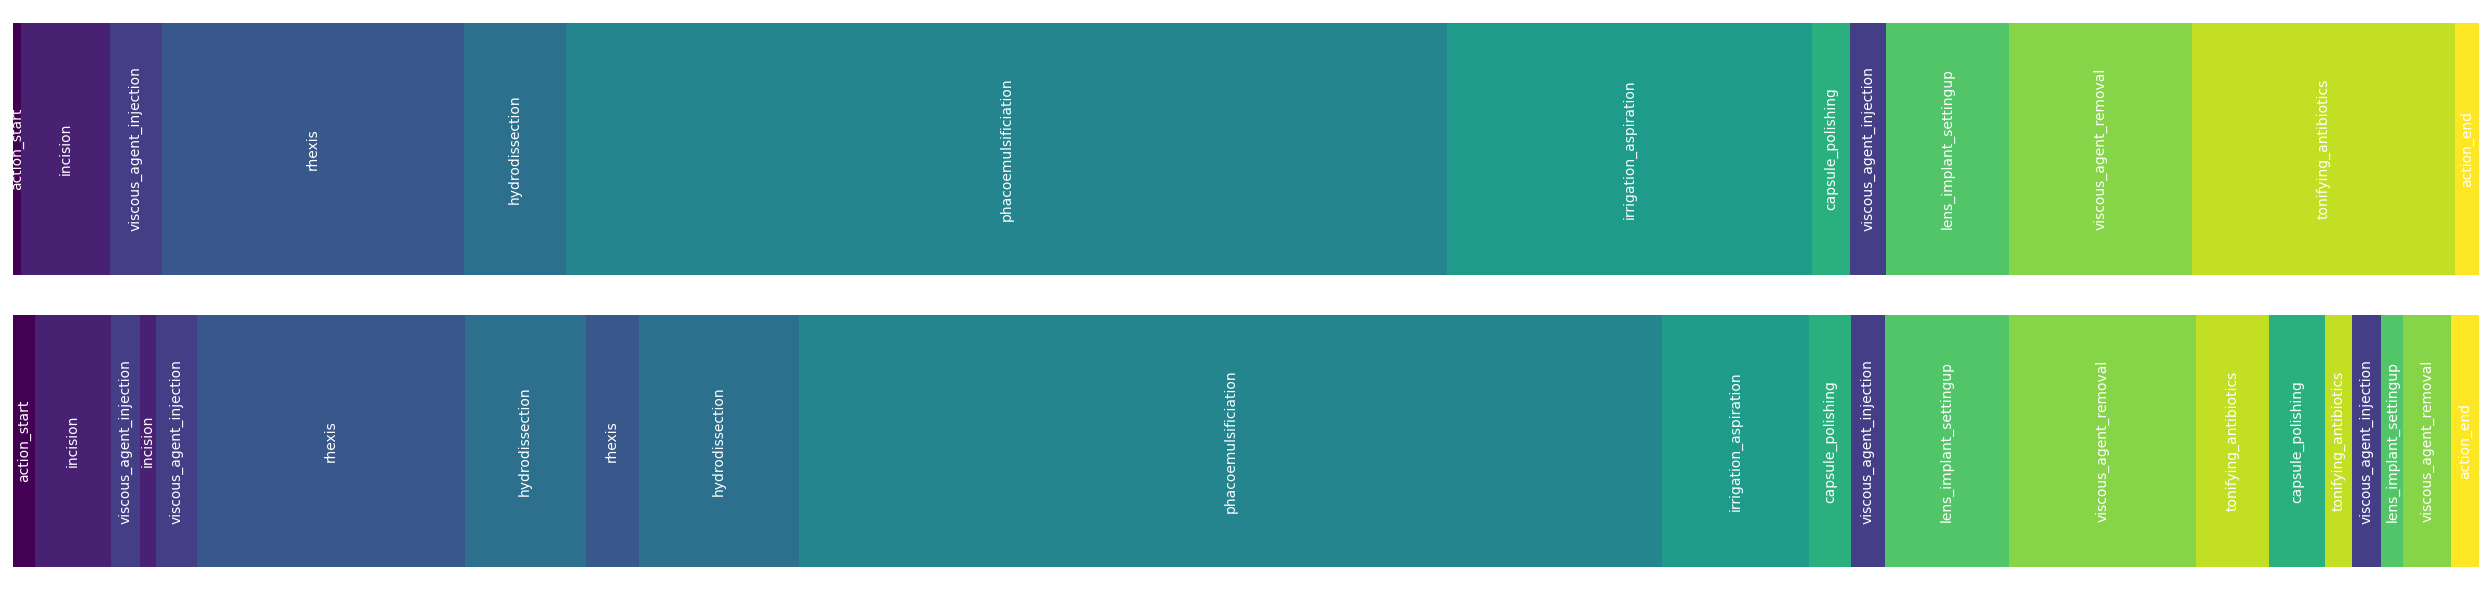

Drawing results for: case_933


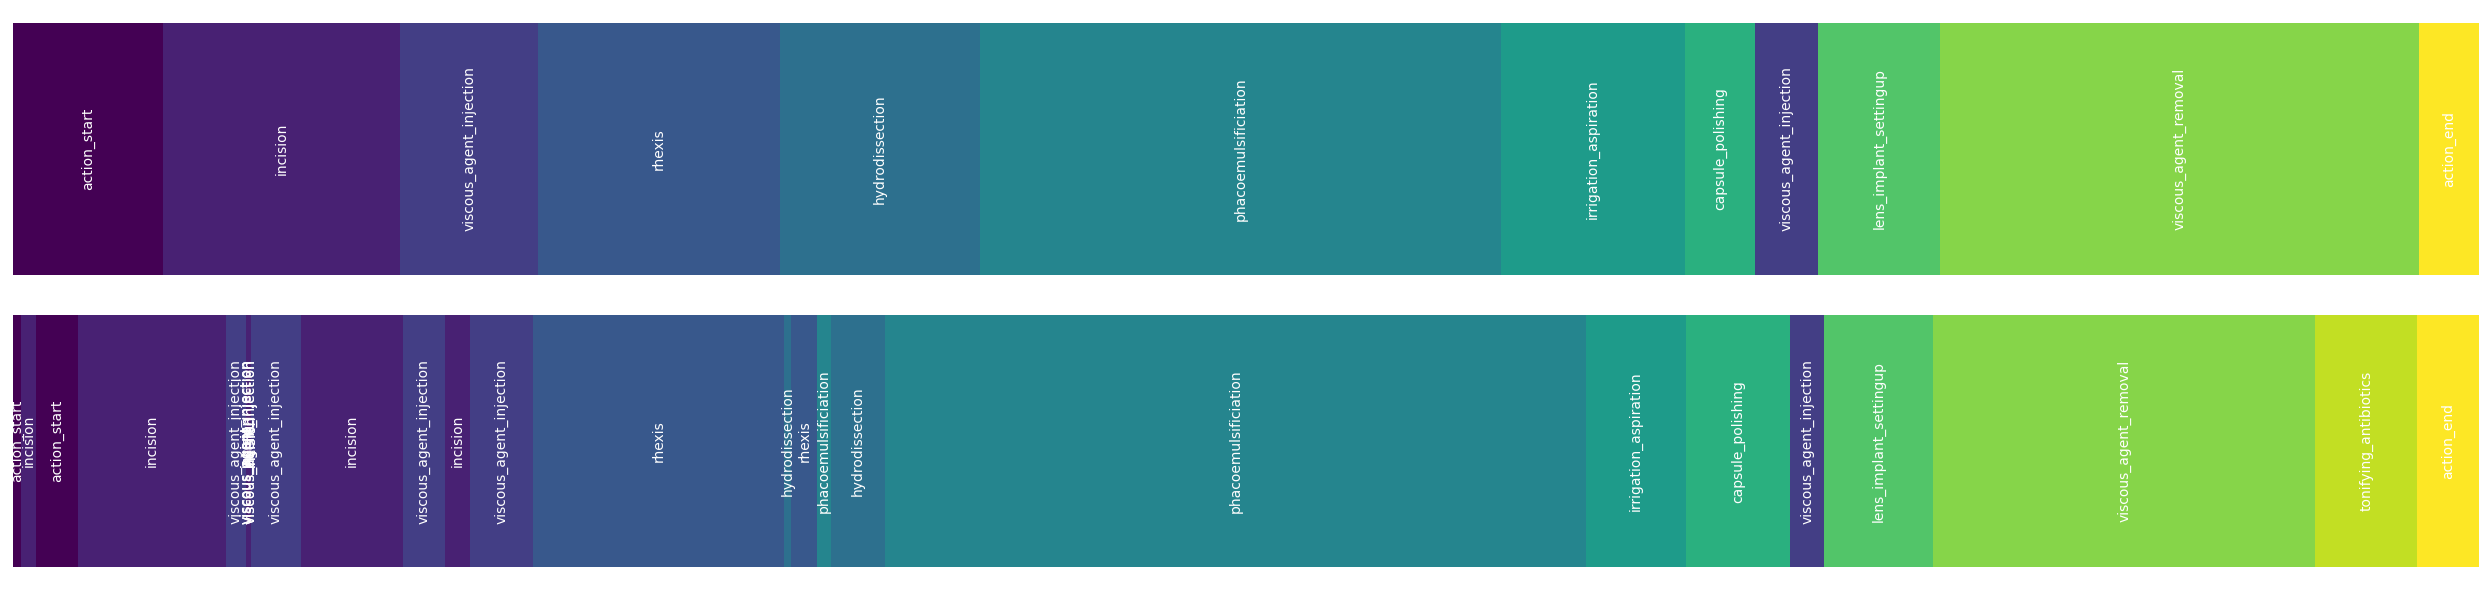

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps


def get_labels(dataset_name):
    if "cataract101" in dataset_name:
        labels = ['action_start', 'incision', 'viscous_agent_injection', 'rhexis', 'hydrodissection', 'phacoemulsificiation', 'irrigation_aspiration', 
                  'capsule_polishing', 'lens_implant_settingup', 'viscous_agent_removal', 'tonifying_antibiotics', 'action_end']
    else:
        labels = ['background', 'main_incision_entry', 'cautery', 'peritomy', 'tunnel_suture', 'hydroprocedure', 'conjunctival_cautery', 'tunnel', 
                  'nucleus_prolapse', 'OVD_IOL_insertion', 'sideport', 'scleral_groove', 'OVD_injection', 'cortical_wash', 'OVD_wash', 'stromal_hydration', 
                  'nucleus_delivery', 'incision', 'capsulorrhexis', 'AB_injection_and_wash']
    return labels


def get_colormap(labels, cm_name='viridis'):
    colormap = colormaps[cm_name]
    colors = colormap(np.linspace(0, 1, len(labels)))
    color_mapping = {labels[i]: colors[i, :][:3] for i in range(len(labels))}
    return color_mapping


def plot_graphs_for_dataset(dataset_name, split, output_dir):
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    files = os.listdir(f"./results/{dataset_name}/split_{split}/")
    files.sort()
    cases = files[::2]    
    
    labels = get_labels(dataset_name)
    color_mapping = get_colormap(labels)
    
    for case in cases:
        print(f'Drawing results for:', case)
        pred_path = f"./results/{dataset_name}/split_{split}/{case}"
        gt_path = f"./data/{dataset_name}/groundTruth/{case}.txt"

        predictions = read_file(pred_path).split('\n')[1].split()
        if predictions[-1] == '': predictions = predictions[:-1]
        ground_truth = read_file(gt_path).split('\n')
        if ground_truth[-1] == '': ground_truth = ground_truth[:-1]
        
        labels_gt, start_gt, end_gt = get_labels_start_end_time(ground_truth)
        labels_pred, start_pred, end_pred = get_labels_start_end_time(predictions)

        data_gt = {"Ground Truth": [end_gt[i] - start_gt[i] for i, _ in enumerate(start_gt)]}
        data_pred = {"Prediction": [end_pred[i] - start_pred[i] for i, _ in enumerate(start_pred)]}
        
        fig, axs = plt.subplots(2, 1, figsize=(25, 6), sharex=True, sharey=True, layout="tight")
        axs[0].axis('off')
        axs[1].axis('off')

        colors_gt = [color_mapping[elm] for elm in labels_gt]
        ax = survey(data_gt, labels_gt, colors_gt, axs[0])
        colors_pred = [color_mapping[elm] for elm in labels_pred]
        ax2 = survey(data_pred, labels_pred, colors_pred, axs[1])
        
        plt.show()
        fig.savefig(output_dir + case + ".png")

dataset = "cataract101_rgb"
plot_graphs_for_dataset(dataset, 0, f"./results/{dataset}/figures/")

In [ ]:
#print(color_mapping, labels_gt)

fig, axs = plt.subplots(2,1, figsize=((25, 6)), sharex=True, sharey=True, layout="tight")
axs[0].axis('off')
axs[1].axis('off')

colors_gt = [color_mapping[elm] for elm in labels_gt]
ax = survey(data_gt, labels_gt, colors_gt, axs[0])
colors_pred = [color_mapping[elm] for elm in labels_pred]
ax2 = survey(data_pred, labels_pred, colors_pred, axs[1])
plt.show()
fig.savefig(OUT_DIR + case + ".png")

x += 1

In [440]:

plt.show()
#fig.savefig(OUT_DIR + case + "_pred.png")